# Implementation

In [166]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt

In [276]:
DIM = (28,28)
def load_image_files(n, path="images/"):
    # helper file to help load the images
    # returns a list of numpy vectors
    images = []
    for f in os.listdir(os.path.join(path,str(n))): # read files in the path
        p = os.path.join(path,str(n),f)
        if os.path.isfile(p):
            i = np.loadtxt(p)
            assert i.shape == DIM # just check the dimensions here# i is loaded as a matrix, but we are going to flatten it into a single vector
            images.append(i.flatten())
    return images
A = load_image_files(0)
B = load_image_files(1)
N = len(A[0]) # the total size
assert N == DIM[0]*DIM[1] # just check our sizes to be sure# set up some random initial weights

In [293]:
weights = np.random.normal(0,1,size=N)
def perceptron(w,x):
    if np.dot(w,x) >= 0:
        return 1
    return 0
average_accuracy = []
for i in np.arange(6000): 
    correct = 0
    for j in np.arange(25):
        y = np.random.randint(2)
        if (y == 0):
            x = random.choice(A)
            perceptron_output = perceptron(weights, x)
            if (perceptron_output == 1):
                weights -= x
            else: 
                correct += 1
        else:
            x = random.choice(B)
            perceptron_output = perceptron(weights, x)
            if (perceptron_output == 0):
                weights += x
            else:
                correct +=1 
    accuracy = correct/25
    average_accuracy = np.append(average_accuracy, accuracy)

# Question 1

Text(0.5,1,'Perceptron Learning by Trainings on 25 items')

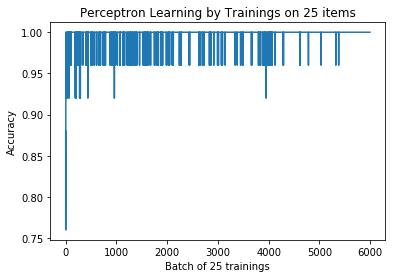

In [294]:
plt.plot(average_accuracy)
plt.xlabel('Batch of 25 trainings')
plt.ylabel('Accuracy')
plt.title('Perceptron Learning by Trainings on 25 items')

# Question 2

My plot hits 100% quickly, but is difficult to tell whether it converges to 100%. Perceptrons can only solve linear separable problems. Since our implementation is not able to converge to 100% consistently, and therefore cannot solve the problem, then 0 and 1 are not linearly separable in our feature space.


























 





















# Question 3

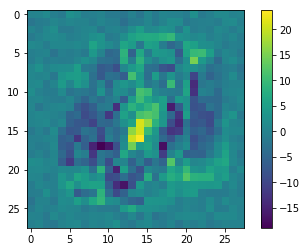

In [295]:
weights_reshaped = weights
weights_reshaped = np.reshape(weights_reshaped, (28,28))
plt.imshow(weights_reshaped)
plt.colorbar()

This graphic shows a weight matrix trained on a series of images of 0s and 1s. In our implementation, to parse apart 0 & 1, we added to the weight matrix whenever we saw a handwritten "1" (indicated by values 1 in the vectors) and subtracted from the weight matrix wherever we saw a handwritten "0" (indicated by values 1 in the vectors). 

This has resulted in a matrix with large negative weights (the blue circle) that indicate: where frequently, when the image was a handwritten 0, those areas were valued at 1.

Vice versa, there are large positive weights (the center yellow line) that indicate where frequently, when the image was a handwritten 1, those areas were valued at 1.

Finally, the points graded near zero (much of the background and outskirts) indicate where frequently, when the image was either a handwritten 1 or 0, those areas were valued at 0. In other words, the backgrounds of all the images create the background of the final weighted image.











# Question 4

In [296]:
avg_accuracy = []
sorted_weights = sorted(abs(weights))
zeroed_weights = weights
for i in np.arange(10,781,10):
    correct = 0
    minimum = sorted_weights[i]   
    for k in np.arange(len(weights)):
        if abs(zeroed_weights[k]) <= minimum:
            zeroed_weights[k] = 0
    for j in np.arange(1000):
        y = np.random.randint(2)
        if (y == 0):
            x = random.choice(A)
            if perceptron(zeroed_weights, x) == 0:
                correct += 1
        else:
            x = random.choice(B)
            if perceptron(zeroed_weights, x) == 1:
                correct += 1
    accuracy = correct/1000
    avg_accuracy = np.append(avg_accuracy, accuracy)

Text(0,0.5,'Accuracy')

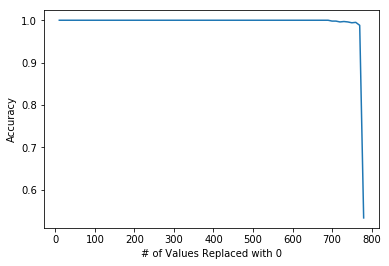

In [302]:
plt.plot(np.arange(10,781,10), avg_accuracy)
plt.xlabel('# of Values Replaced with 0')
plt.ylabel('Accuracy')

This plot shows accuracy as we iteratively replace more and more points that are close to zero with 0. It falls off steeply at about 750 points. This is almost entirely the whole data set, which has 780 items.

Essentially, this means that a large proportion of our weights are actually already very close to zero, the background items, which do not contribute much to our algorithm in deciding whether an image is a 1 or 0.

# Question 5

In [303]:
A = load_image_files(0)
B = load_image_files(1)
C = load_image_files(2)
D = load_image_files(3)
E = load_image_files(4)
F = load_image_files(5)
G = load_image_files(6)
H = load_image_files(7)
I = load_image_files(8)
J = load_image_files(9)

In [373]:
numbers = [A,B,C,D,E,F,G,H,I,J]

def pair_accuracies(i,j):
    weights = np.random.normal(0,1,size=N)
    average_accuracy = []
    
    for a in np.arange(500): 
        correct = 0
        for b in np.arange(25):
            y = np.random.randint(2)
            if (y == 0):
                x = random.choice(numbers[i])
                perceptron_output = perceptron(weights, x)
                if (perceptron_output == 1):
                    weights -= x
                else: 
                    correct += 1
            else:
                x = random.choice(numbers[j])
                perceptron_output = perceptron(weights, x)
                if (perceptron_output == 0):
                    weights += x
                else:
                    correct +=1 
    accuracy = correct/25
    average_accuracy = np.append(average_accuracy, accuracy)
    
    return max(average_accuracy)

final_accuracies = []
for i in np.arange(10): #initial number
    row_accuracies = []
    for j in np.arange(10): #comparison number to initial number
        row_accuracies.append(pair_accuracies(i,j))
    
    final_accuracies.append(row_accuracies)
    
for i in np.arange(10):
    for j in np.arange(10):
        if i == j:
            final_accuracies[i][j] = 1

[[1, 0.96, 1.0, 0.96, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1, 1.0, 0.96, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1, 1.0, 0.92, 0.96, 1.0, 0.96, 1.0, 0.96],
 [0.96, 1.0, 1.0, 1, 0.96, 0.96, 1.0, 0.96, 0.84, 0.96],
 [1.0, 0.96, 0.96, 1.0, 1, 1.0, 0.96, 0.96, 1.0, 0.96],
 [0.96, 1.0, 1.0, 0.92, 1.0, 1, 1.0, 1.0, 0.96, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 0.96, 1, 1.0, 1.0, 1.0],
 [0.96, 0.96, 1.0, 1.0, 0.96, 1.0, 1.0, 1, 0.96, 0.92],
 [1.0, 1.0, 0.96, 0.84, 1.0, 0.96, 1.0, 0.96, 1, 0.96],
 [1.0, 1.0, 1.0, 0.92, 1.0, 0.96, 1.0, 0.88, 0.92, 1]]

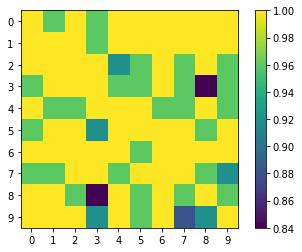

In [374]:
plt.imshow(final_accuracies)
plt.xticks(np.arange(10))
plt.yticks(np.arange(10))
plt.colorbar()
final_accuracies

This heat map shows does match my intuitions about how easy it might be to separate certain numbers based on how similar their features are. For example, 9 and 7 are very close except for the closure of the circle. It also makes sense that 0 is the most differentiable as it is the most different feature wise (a large circle) from all the others.